# TP2 Robotica Movel - Roadmap

## Alunos
- Bernardo Nogueira Borges 2020006396
- Daniele Cassia Silva Diniz 2020076874


### Importando Libs

In [253]:
from coppeliasim_zmqremoteapi_client import RemoteAPIClient
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import networkx as nx
import numpy as np

client = RemoteAPIClient()
sim = client.require('sim')
np.set_printoptions(precision=3,suppress=True)

### Obtendo Objetos de Interesse

Imagem carregada


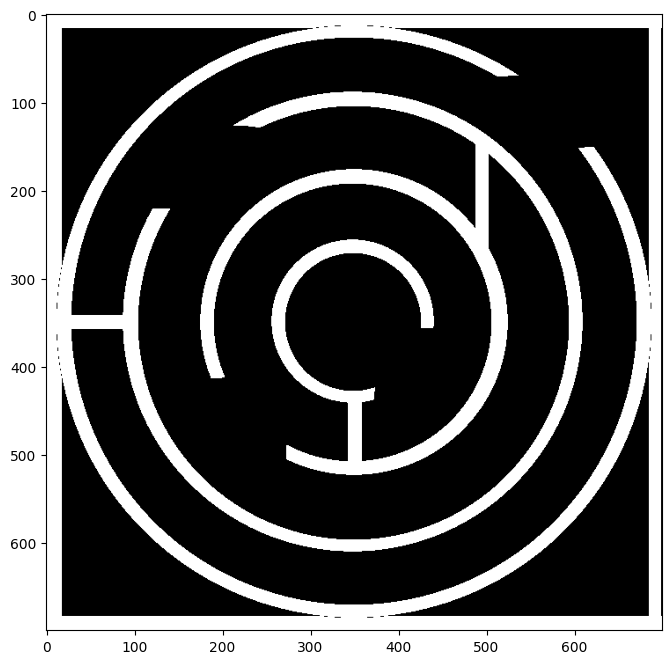

In [262]:
# Objetos de interesse

# Flag para evitar figuras nao utilizadas
CREATE_PLOTS = True

# Cave
figsize = (8,8)
img = 1 - mpimg.imread('../scene/cave.png')
dims = [70,70] # Dimensoes do mapa (m)
cell_size = 2  # Tamanha da celula do grid (m)
start_node = (8,7)
end_node = (8,9)

# Inv C
figsize = (8,8)
img = 1 - mpimg.imread('../img/invC.png')
dims = [70,70] # Dimensoes do mapa (m)
cell_size = 2  # Tamanha da celula do grid (m)
start_node = (8,7)
end_node = (8,9)

# Definir range x e y para a conversao de mapa-cena
gridXrange = (0,35) # para direita
gridYrange = (0,35) # para baixo
sceneXrange = (-10,10) # para direita
sceneYrange = (10,-10) # para baixo

# Apenas para garantir que só teremos esses dois valores
threshold = 0.5
img[img > threshold] = 1
img[img<= threshold] = 0


# Definindo figura 
if CREATE_PLOTS:
    fig = plt.figure(figsize=figsize,dpi=100)
    ax = fig.add_subplot(111,aspect='equal')
    ax.imshow(img, cmap='Greys', origin='upper')

print("Imagem carregada")

### Definindo Grid

Grid definida


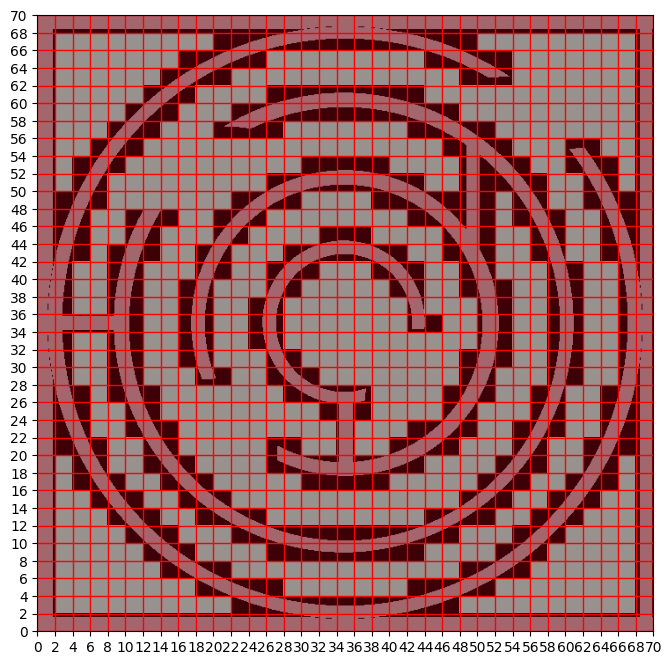

In [263]:
# Dimensões do mapa informado em metros (X, Y)
map_dims = np.array(dims)

# Escala Pixel/Metro
sy, sx = img.shape[:2] / map_dims

rows, cols = (map_dims / cell_size).astype(int)
grid = np.zeros((rows, cols))

# Preenchendo o Grid
# Cada célula recebe o somatório dos valores dos Pixels
for r in range(rows):
    for c in range(cols):
        
        xi = int(c*cell_size*sx)
        xf = int(xi + cell_size*sx)
        
        yi = int(r*cell_size*sy)
        yf = int(yi + cell_size*sy)
                      
        grid[r, c] = np.sum(img[yi:yf,xi:xf])
        
# Binarizando as células como Ocupadas (1) ou Não-ocupadas (0)       
grid[grid > threshold] = 1
grid[grid<= threshold] = 0        

if CREATE_PLOTS:
    fig = plt.figure(figsize=(8,8), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')

    # Plotando Mapa e Células
    obj = ax.imshow(img, cmap='Greys', extent=(0, map_dims[1], 0, map_dims[0]), origin='upper')
    obj = ax.imshow(grid, cmap='Reds', extent=(0, map_dims[1], 0, map_dims[0]), alpha=.6)

    # Plotando as linhas do grid para facilitar a visualização
    ax.grid(which='major', axis='both', linestyle='-', color='r', linewidth=1)
    ax.set_xticks(np.arange(0, map_dims[1]+1, cell_size))
    ax.set_yticks(np.arange(0, map_dims[0]+1, cell_size))

print("Grid definida")

### Criando o Grafo para o nosso Grid

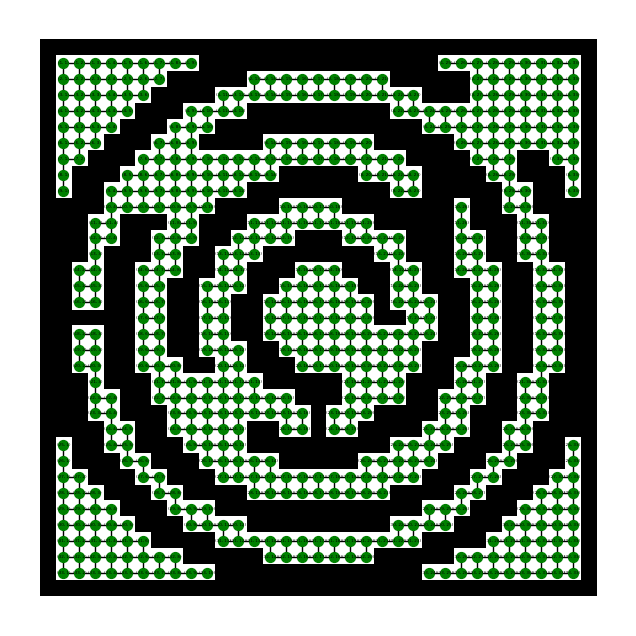

In [264]:

# Criando vértices em todas as células
G = nx.grid_2d_graph(rows, cols) 

# Removendo células que estão em células marcas com obstáculos
for r in range(rows):
    for c in range(cols):
        if grid[r][c] == 1:  
            G.remove_node((r,c))


if CREATE_PLOTS:
    fig = plt.figure(figsize=(8,8), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')

    # Grid
    obj = ax.imshow(grid, cmap='Greys', extent=(0, map_dims[1], 0, map_dims[0]))

    ax.grid(which='major', axis='both', linestyle='-', color='r', linewidth=1)
    ax.set_xticks(np.arange(0, map_dims[1]+1, cell_size))
    ax.set_yticks(np.arange(0, map_dims[0]+1, cell_size))

    # Os vértices serão plotados no centro da célula  
    pos = { node: (node[1]*cell_size+cell_size/2, map_dims[0]-node[0]*cell_size-cell_size/2) for node in G.nodes() }
    nx.draw(G, pos, font_size=3, with_labels=True, node_size=50, node_color="g", ax=ax)

### Determinar menor caminho

Menor caminho identificado


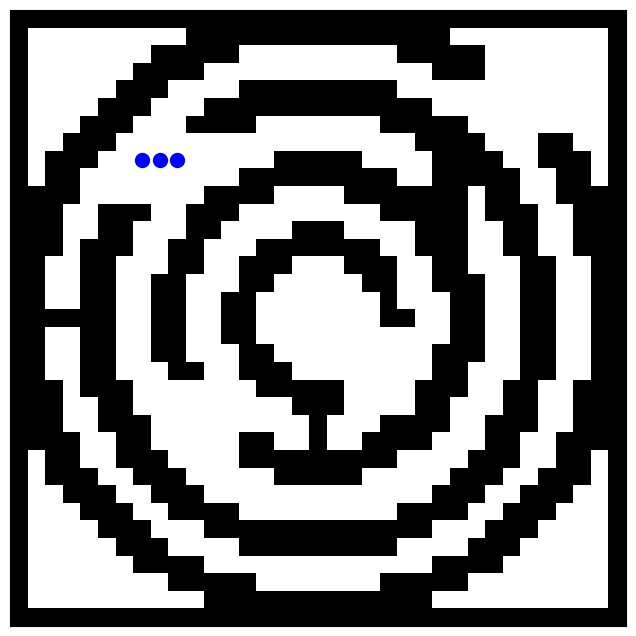

In [265]:
path = nx.shortest_path(G, source=start_node, target=end_node)

if CREATE_PLOTS:
    fig = plt.figure(figsize=(8,8), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')

    # Mapa
    obj = ax.imshow(grid, cmap='Greys', extent=(0, map_dims[1], 0,map_dims[0]))

    nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=100, node_color='b')

print("Menor caminho identificado")

## Movendo o robô

In [266]:
print("TODO")
print("Usando os pontos:")
# print(path)
# print(f"Mover o robo de {start_node} ate {end_node}")

def Rz(theta):
    return np.array(
        [[ np.cos(theta), -np.sin(theta), 0 ],
         [ np.sin(theta), np.cos(theta) , 0 ],
         [ 0            , 0             , 1 ]])


TODO
Usando os pontos:


In [ ]:
def convertLinear(s1,s2):
    (low1,up1) = s1
    (low2,up2) = s2
    def fn(x):
        x -= low1
        if low1 > up1: x *= -1
        x /= abs(up1 - low1)
        # Reached 0,1
        x *= abs(up2 - low2)
        if low2 > up2: x *= -1
        x += low2
        return x
    return fn
       
def gridToScene(coords):
    (x,y) = coords
    fx = convertLinear(gridXrange,sceneXrange)
    fy = convertLinear(gridYrange,sceneYrange)
    return (fy(y),fx(x))

def sceneToGrid(coords):
    (x,y) = coords
    fx = convertLinear(sceneXrange,gridXrange)
    fy = convertLinear(sceneYrange,gridYrange)
    return (fy(y),fx(x))


In [ ]:
sim.stopSimulation()

# Iniciar o robotino
L = 0.135 # m
r = 0.040 # m
robotino = sim.getObject("/robotino")
start_pos = gridToScene(start_node)
sim.setObjectPosition(robotino,list(map(int,[start_pos[0],start_pos[1],0.1])))

wheels = [0]*3
for i in range(3):
    wheels[i] = sim.getObject(f"/wheel{i}_joint")

    # Parar as rodas inicialmente
    sim.setJointTargetVelocity(wheels[i],0)


In [ ]:


# Cinemática Direta
Mdir = np.array([[-r/np.sqrt(3), 0, r/np.sqrt(3)], [r/3, (-2*r)/3, r/3], [r/(3*L), r/(3*L), r/(3*L)]])
        
# Goal configuration (x, y, theta)    

# ? Mudar para cada ponto desejado :)
goal_pos = gridToScene(end_node)
qgoal = np.array([goal_pos[0], goal_pos[1] , 0.1])

# Frame que representa o Goal
goalObject = sim.getObject("/Goal")
sim.setObjectPosition(goalObject,list(map(int,[qgoal[0],qgoal[1],0])))
sim.setObjectOrientation(goalObject,list(map(int,[0,0,qgoal[2]])))

gain = [[0.1,0,0],
        [0,0.1,0],
        [0,0,0.1]]

sim.startSimulation()

while False:
    pos = sim.getObjectPosition(robotino)
    ori = sim.getObjectOrientation(robotino)
    q = np.array([pos[0],pos[1],ori[2]])

    error = qgoal - q

    # Margem aceitavel de distancia
    if np.linalg.norm(error[:2]) < 0.1:
        break

    # Controller
    qdot = gain @ error

    # Cinematica Inversa
    # w1, w2, w3
    Minv = np.linalg.inv(Rz(q[2]) @ Mdir)
    u = Minv @ qdot

    # Enviando velocidades
    for i in range(3):
        sim.setJointTargetVelocity(wheels[i], u[i])

for i in range(3):
    sim.setJointTargetVelocity(wheels[i], 0)

sim.stopSimulation()
